In [2]:
#!pip3 install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26817 sha256=1f8d8e07a5c57965f66978955b678e63049ba8f16b312a2926cf839df02af071
  Stored in directory: /home/ashish/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql
import string
import re
import nltk
nltk.download('stopwords')
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/ashish/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
[nltk_data] Downloading package stopwords to /home/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
rindia = pd.read_csv('all_rIndiaScrape.csv')

In [4]:
rindia.head()

,id,title,content,is_original_content,author,flair,score,timestamp,comments_count,crossposts_count,comments,removed_by,self_posted,nsfw,is_stickied,url
0,g014wc,"Lost my Job, Sick Mother and Paralysed Dad, In...",Hi....It's really tough time for everyone. I r...,False,sanand_satwik,AskIndia,1049,2020-04-13 07:12:28,131,3,Uh maybe this is out of your reach financially...,NaN,True,False,False,https://www.reddit.com/r/india/comments/g014wc...
1,fxofyu,Why does the government come with a begging bo...,"We have floods, terrorist attacks, famines due...",False,TWO-WHEELER-MAFIA,AskIndia,646,2020-04-09 21:34:21,204,0,All money went to Statue of Unity!,NaN,True,False,False,https://www.reddit.com/r/india/comments/fxofyu...
2,g0zlly,Mother's condition is going worse due to hepat...,"Hi folks, I really appreciate the warm respons...",False,sanand_satwik,AskIndia,761,2020-04-14 18:56:11,94,0,Upvoted for visibility,NaN,True,False,False,https://www.reddit.com/r/india/comments/g0zlly...
3,fvy95j,Men who are 30+ and have decided not to get ma...,The corona virus has given me some time to thi...,False,indianoogler,AskIndia,264,2020-04-07 02:26:25,206,0,I don’t think I’ll make it to old age. I doubt...,NaN,True,False,False,https://www.reddit.com/r/india/comments/fvy95j...
4,g1lmhg,[Please Advice] Reality punched me in the face...,"Sorry Reddit, this post is going to be long. P...",False,throaway-forprivacy,AskIndia,434,2020-04-15 18:49:08,83,0,Don't take on formal debt to clear informal de...,NaN,True,False,False,https://www.reddit.com/r/india/comments/g1lmhg...


In [5]:
rindia.info()
rindia.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2882 non-null   object 
 1   title                2882 non-null   object 
 2   content              1236 non-null   object 
 3   is_original_content  2882 non-null   bool   
 4   author               2882 non-null   object 
 5   flair                2882 non-null   object 
 6   score                2882 non-null   int64  
 7   timestamp            2882 non-null   object 
 8   comments_count       2882 non-null   int64  
 9   crossposts_count     2882 non-null   int64  
 10  comments             2720 non-null   object 
 11  removed_by           0 non-null      float64
 12  self_posted          2882 non-null   bool   
 13  nsfw                 2882 non-null   bool   
 14  is_stickied          2882 non-null   bool   
 15  url                  2882 non-null   o

,score,comments_count,crossposts_count,removed_by
count,2882.000000,2882.000000,2882.000000,0.0
mean,303.589521,175.237682,0.283137,NaN
std,846.937984,458.747959,1.638965,NaN
min,0.000000,0.000000,0.000000,NaN
25%,20.000000,9.000000,0.000000,NaN
50%,71.000000,29.000000,0.000000,NaN
75%,223.000000,100.000000,0.000000,NaN
max,19715.000000,8367.000000,56.000000,NaN


In [6]:
rindia = rindia.drop_duplicates()

In [7]:
rindia.shape,rindia.dtypes

((2882, 16),
 id                      object
 title                   object
 content                 object
 is_original_content       bool
 author                  object
 flair                   object
 score                    int64
 timestamp               object
 comments_count           int64
 crossposts_count         int64
 comments                object
 removed_by             float64
 self_posted               bool
 nsfw                      bool
 is_stickied               bool
 url                     object
 dtype: object)

In [8]:
rindia.isnull().sum()

id                        0
title                     0
content                1646
is_original_content       0
author                    0
flair                     0
score                     0
timestamp                 0
comments_count            0
crossposts_count          0
comments                162
removed_by             2882
self_posted               0
nsfw                      0
is_stickied               0
url                       0
dtype: int64

Plotting the frequency distribution of flairs over all posts

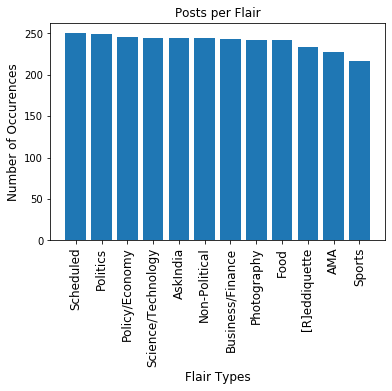

In [9]:
# flair count
num_flair = rindia.flair.value_counts()

# Plotting posts per flair

plt.bar(num_flair.index,num_flair)
plt.title("Posts per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

Plotting the distribution of adult content

Content Marked as NSFW - over 18 age: False    2882
Name: nsfw, dtype: int64


[Text(0.5, 0, 'Adult content'), Text(0.5, 1.0, 'Distribution of Conetent')]

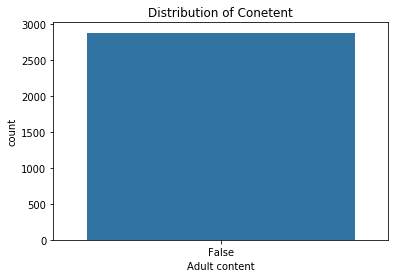

In [10]:
# Getting the count of content marked as nsfw i.e. content over 18 age
nsfw_count = rindia['nsfw'].value_counts()
print("Content Marked as NSFW - over 18 age:",nsfw_count)

# Plotting count of adult content
fig, ax = plt.subplots()
sns.countplot(rindia.nsfw)
ax.set(xlabel='Adult content', title='Distribution of Conetent')

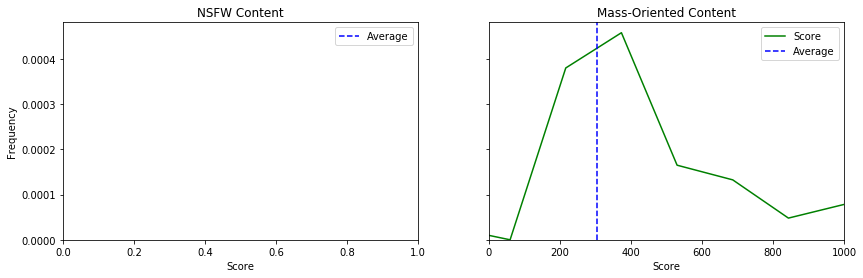

In [11]:
'''
If the distribution is uneven, checking for exact count.
'''

#(rindia[rindia['nsfw'] == True]['id'].count() / rindia.shape[0] ) * 100
nsfw_avg = rindia[rindia['nsfw'] == True]['score'].mean()
mass_avg = rindia[rindia['nsfw'] == False]['score'].mean()
fig, (ax0, ax1) = plt.subplots(
nrows=1,ncols=2, sharey=True, figsize=(14,4))
sns.kdeplot(rindia[rindia['nsfw'] == True]['score'], ax=ax0, color='black', label='Score')
sns.kdeplot(rindia[rindia['nsfw'] == False]['score'], ax=ax1, color='green', label='Score')
ax1.set(xlim=(0,1000), xlabel='Score', title='Mass-Oriented Content')
ax0.set(xlabel='Score', title='NSFW Content', ylabel='Frequency')
ax0.axvline(x=nsfw_avg, label='Average', linestyle='--', color='blue')
ax1.axvline(x=mass_avg, label='Average', linestyle='--', color='blue')
ax1.legend()
ax0.legend()

The graph shows no occurence of NSFW content. 

In [12]:
df_time = rindia.set_index('timestamp')